# Masalah di Interpolasi Polinomial

Misalkan diberikan 21 pasang titik $(x_k,y_k)$ dimana $k=0,1,...,20$. Tujuannya adalah mencari suatu fungsi yang melalui titik-titik tersebut.

Pertama, kita gunakan interpolasi Lagrange: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import interpolate

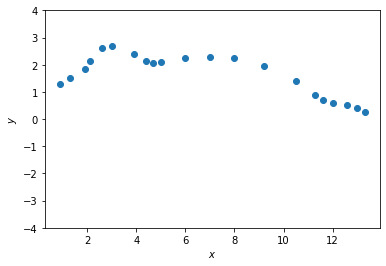

In [3]:
x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.12, 2.6, 2.7, 2.4, 2.15, 2.05, 2.11, 2.25, 2.3, 2.26, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

plt.scatter(x,y);
plt.xlabel("$x$");
plt.ylabel("$y$");
plt.ylim([-4, 4]);

In [4]:
f = interpolate.lagrange(x,y) # 20 derajat polinomial

In [5]:
f

poly1d([-3.54868435e-11,  4.94299642e-09, -3.20527566e-07,  1.28512185e-05,
       -3.56883654e-04,  7.28781256e-03, -1.13401396e-01,  1.37498064e+00,
       -1.31748437e+01,  1.00596514e+02, -6.14483947e+02,  3.00331353e+03,
       -1.17053352e+04,  3.61211679e+04, -8.72406759e+04,  1.62083353e+05,
       -2.25783901e+05,  2.26808970e+05, -1.54212429e+05,  6.31122777e+04,
       -1.16552715e+04])

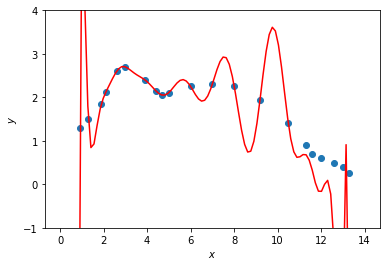

In [6]:
xi = np.linspace(0, 14, 100)
plt.plot(xi, f(xi), 'r')
plt.scatter(x,y)
plt.xlabel("$x$");
plt.ylabel("$y$");
plt.ylim([-1, 4]);

Contoh 1:
Diberikan titik (1,2), (2,3), dan (3,5)

In [7]:
x = np.array([1,2,3])
y = np.array([2,3,5])

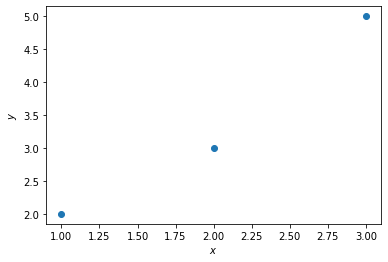

In [8]:
plt.scatter(x,y);
plt.xlabel("$x$");
plt.ylabel("$y$");

In [9]:
S0 = lambda x: 2 + 0.75*(x-1) + 0.25*(x-1)**3
S1 = lambda x: 3 + (3/2)*(x-2) + 0.75*(x-2)**2 - (0.25)*(x-2)**4

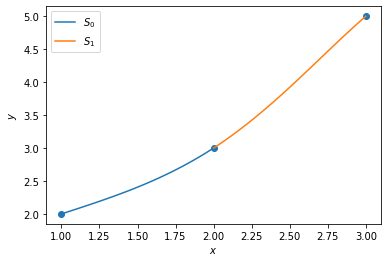

In [10]:
xi1 = np.linspace(1, 2, 100)
xi2 = np.linspace(2, 3, 100)
plt.plot(xi1, S0(xi1), label='$S_0$')
plt.plot(xi2, S1(xi2), label='$S_1$')
plt.scatter(x,y);
plt.xlabel("$x$");
plt.ylabel("$y$");
plt.legend();

In [11]:
def cubic_spline(data):
  n = len(data)
  data = np.array(data)
  h= []

  for i in range(n):
    h.append(data[i+1,0] - data[i,0])
  
  
  

  



In [12]:
X = [(0,1), (1,np.exp(1)), (2,(np.exp(1))**2), (3,(np.exp(1))**3)]
n = len(X)
X = np.array(X)
h = []

In [13]:
X

array([[ 0.        ,  1.        ],
       [ 1.        ,  2.71828183],
       [ 2.        ,  7.3890561 ],
       [ 3.        , 20.08553692]])

In [14]:
h = [(X[i+1,0] - X[i,0]) for i in range(n-1)]
h

[1.0, 1.0, 1.0]

In [15]:
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

a = [1 if n <= 3 else h[i] for i in range(n-2)]
b = [2*(h[i-1]+h[i]) for i in range(1, n-1)]
c = [h[i] for i in range(1, n-1)]

In [22]:
a = np.array(h[:n-2])
a = np.append(a, 0)

In [23]:
a

array([1., 1., 0.])

In [18]:
b = np.array(h[1:])
b = np.insert(b, 0, 0)

In [19]:
b

array([0., 1., 1.])

In [20]:
c = np.zeros(n-2)
for i in range(n-2):
  c[i] = 2*(h[i-1] + h[i])
c = np.append(c, 1)
c = np.insert(c, 0, 1)
c

array([1., 4., 4., 1.])

In [24]:
tridiag(a,b,c)

ValueError: ignored

In [25]:
from scipy import linalg

In [31]:
linalg.toeplitz([4,1,0],[1,4,1])

array([[4, 4, 1],
       [1, 4, 4],
       [0, 1, 4]])